<font size =5> New York City Yellow Cab - Good Tip Classification <font>

### Loading The Data and Importing the required libraries
Load the features of taxi trips in New York City dataset and Import the required libraries.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot as plt

In [3]:
# Load the dataset.
df = pd.read_csv('exam_data.csv')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,2,2016-02-07 16:20:15,2016-02-07 16:29:07,1,1.58,-74.004936,40.740719,1,N,...,8.5,0.0,0.5,0.00,0.0,0.3,9.30,False,False,True
1,2,2,2016-02-19 20:51:20,2016-02-19 21:11:27,6,3.04,-73.973763,40.763351,1,N,...,14.0,0.5,0.5,3.82,0.0,0.3,19.12,True,True,False
2,3,1,2016-02-19 20:53:25,2016-02-19 20:56:17,1,0.60,-73.961571,40.811527,1,N,...,4.5,0.5,0.5,0.00,0.0,0.3,5.80,False,True,True
3,4,1,2016-02-19 20:54:47,2016-02-19 21:06:08,1,2.10,-73.960197,40.770557,1,N,...,10.0,0.5,0.5,2.80,0.0,0.3,14.10,True,True,False
4,5,2,2016-02-19 20:55:31,2016-02-19 21:06:03,1,1.79,-73.986656,40.762379,1,N,...,9.0,0.5,0.5,0.00,0.0,0.3,10.30,False,True,False


Let's first look at the complete information on the `df` DataFrame.

In [4]:
# Check the number of rows and columns in the 'dataset'.
df.shape

(28454, 23)

In [5]:
# Apply the 'info()' function on the 'df' DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28454 non-null  int64  
 1   VendorID               28454 non-null  int64  
 2   tpep_pickup_datetime   28454 non-null  object 
 3   tpep_dropoff_datetime  28454 non-null  object 
 4   passenger_count        28454 non-null  int64  
 5   trip_distance          28454 non-null  float64
 6   pickup_longitude       28454 non-null  float64
 7   pickup_latitude        28454 non-null  float64
 8   RatecodeID             28454 non-null  int64  
 9   store_and_fwd_flag     28454 non-null  object 
 10  dropoff_longitude      28454 non-null  float64
 11  dropoff_latitude       28454 non-null  float64
 12  payment_type           28454 non-null  int64  
 13  fare_amount            28454 non-null  float64
 14  extra                  28454 non-null  float64
 15  mt

In [6]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000
mean,14227.500000,1.531208,1.647326,2.861006,-72.856299,40.135362,1.043087,-72.926336,40.174826,1.330709,12.349264,0.330762,0.497786,1.777649,0.275885,0.299715,15.531061
std,8214.106616,0.499034,1.306208,3.688742,9.025006,4.971765,0.866217,8.741253,4.815591,0.484680,10.562863,0.443076,0.035253,2.733388,1.323608,0.011927,13.032636
min,1.000000,1.000000,1.000000,0.000000,-74.272102,0.000000,1.000000,-74.325638,0.000000,1.000000,-52.000000,-1.000000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,7114.250000,1.000000,1.000000,1.000000,-73.991783,40.736351,1.000000,-73.991241,40.734728,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,14227.500000,2.000000,1.000000,1.650000,-73.981628,40.753462,1.000000,-73.979713,40.753820,1.000000,9.000000,0.000000,0.500000,1.350000,0.000000,0.300000,11.750000
75%,21340.750000,2.000000,2.000000,3.030000,-73.966759,40.768070,1.000000,-73.962448,40.769656,2.000000,14.000000,0.500000,0.500000,2.350000,0.000000,0.300000,17.160000
max,28454.000000,2.000000,6.000000,180.100000,0.000000,40.884964,99.000000,0.000000,41.241875,4.000000,456.000000,4.500000,0.500000,220.000000,31.000000,0.300000,456.300000


### Data Preprocessing

In [7]:
# Check for the missing values in the 'df' DataFrame.
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
GoodTip                  0
Extra                    0
Cash                     0
dtype: int64

There are no missing values in the DataFrame.


In [8]:
df.nunique()

Unnamed: 0               28454
VendorID                     2
tpep_pickup_datetime     28254
tpep_dropoff_datetime    28271
passenger_count              6
trip_distance             1587
pickup_longitude          9240
pickup_latitude          15492
RatecodeID                   6
store_and_fwd_flag           2
dropoff_longitude        10251
dropoff_latitude         16755
payment_type                 4
fare_amount                196
extra                        6
mta_tax                      3
tip_amount                 691
tolls_amount                31
improvement_surcharge        3
total_amount              1302
GoodTip                      2
Extra                        2
Cash                         2
dtype: int64

In [9]:
df.duplicated().sum()

0

You can see there are 28454 entries for each column and no missing or duplicated values.

In [10]:
# Drop the 'Unnamed: 0' columns from the 'df' DataFrame.
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [11]:
# Get the list of columns present in the 'df' DataFrame after removing the 'Unnamed: 0' columns.
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'GoodTip', 'Extra', 'Cash'],
      dtype='object')

In [12]:
#coveret tpep_pickup_datetime and tpep_dropoff_datetime from object to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df.tpep_pickup_datetime)
df['tpep_dropoff_datetime'] = pd.to_datetime(df.tpep_dropoff_datetime)

In [13]:
##coveret GoodTip, Extra and Cash from boolean to integer 

le = preprocessing.LabelEncoder()
le.fit(df["GoodTip"])
le.fit(df["Extra"])
le.fit(df["Cash"])

df["GoodTip"] = le.transform(df["GoodTip"])
df["Extra"] = le.transform(df["Extra"])
df["Cash"] = le.transform(df["Cash"])

In [14]:
#checking agian the dataset after convert all the values to numerical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               28454 non-null  int64         
 1   tpep_pickup_datetime   28454 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  28454 non-null  datetime64[ns]
 3   passenger_count        28454 non-null  int64         
 4   trip_distance          28454 non-null  float64       
 5   pickup_longitude       28454 non-null  float64       
 6   pickup_latitude        28454 non-null  float64       
 7   RatecodeID             28454 non-null  int64         
 8   store_and_fwd_flag     28454 non-null  object        
 9   dropoff_longitude      28454 non-null  float64       
 10  dropoff_latitude       28454 non-null  float64       
 11  payment_type           28454 non-null  int64         
 12  fare_amount            28454 non-null  float64       
 13  e

### Imbalanced Data



As our dataset has two classes, then balanced data would mean 50% observations for each class. Let us calculate the number of observations for each class. 

In [15]:
# Print the number of records in each label and their percentage in the 'GoodTip' column
# Print the number of records below and above avreage tip
print("Number of records in each label are")
print(df['GoodTip'].value_counts())

# Print the percentage of each label
print("\nPercentage of records in each label are")
print(df['GoodTip'].value_counts() * 100 / df.shape[0])

Number of records in each label are
0    17490
1    10964
Name: GoodTip, dtype: int64

Percentage of records in each label are
0    61.467632
1    38.532368
Name: GoodTip, dtype: float64


we can observe that the number of observations for each class is approximately 61% and 39%. This means that our dataset is imbalanced, So we need to do oversampling to make our dataset balanced.


### Data Exploration and Data Analysis 

<font size=3> Corelation Matrix <font>

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.

C:\Users\Yahya\AppData\Local\Temp\ipykernel_1084\3809580329.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True);


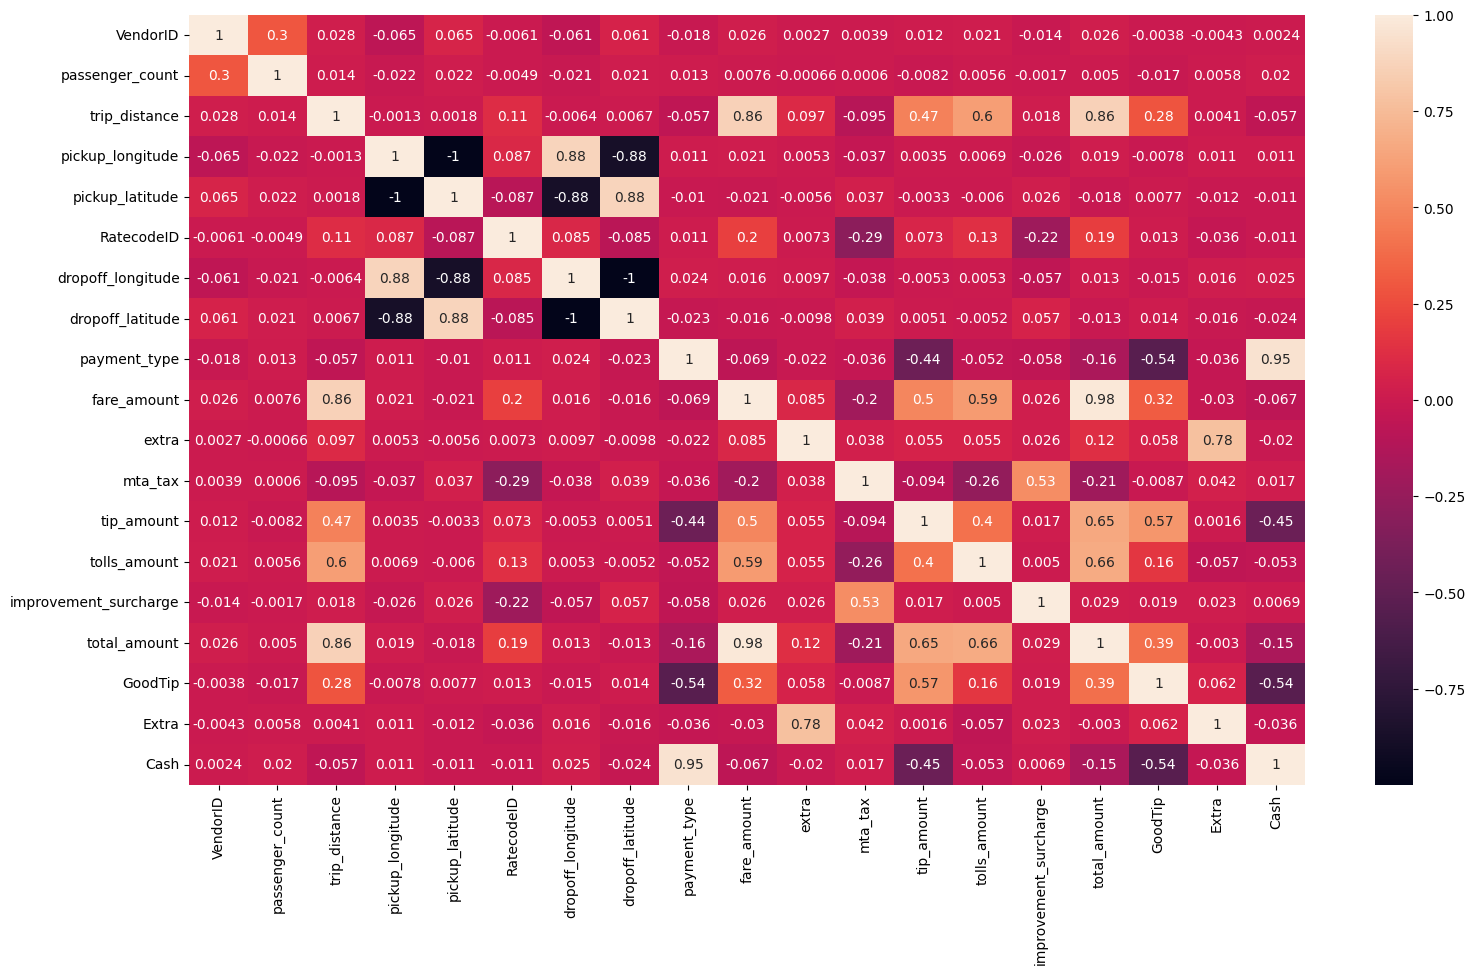

In [16]:
plt.figure(figsize= (18, 10))
sns.heatmap(df.corr(), annot= True);

Observation:
- We can observe that the good tip variable negative corelation with the variable payment type and cash 
- good tip has postive corelation with variable like trip distance, fare amount, tip amount, total amount
- Hence these variables are important for machine learning models to learn to predict good tip class.

<font size=3> Understanding the distribution classes of GoodTip <font>

<Axes: xlabel='GoodTip', ylabel='count'>

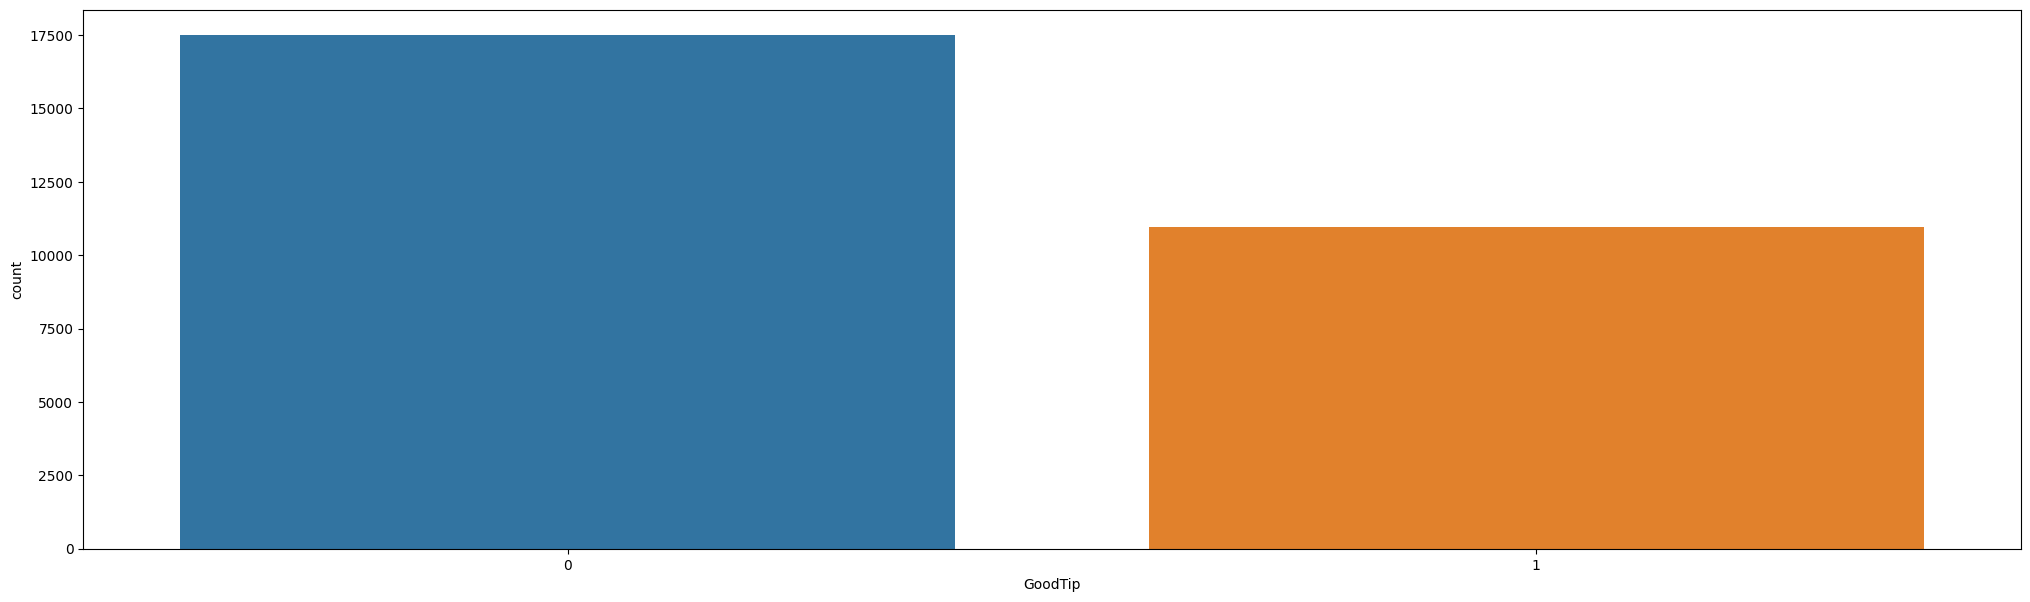

In [17]:
plt.figure(figsize=(25,7))
sns.countplot(x=df["GoodTip"])

<font size=3>Boxplots for understanding the tip amount<font>

Text(0.5, 1.0, 'Good Tip by tip amount')

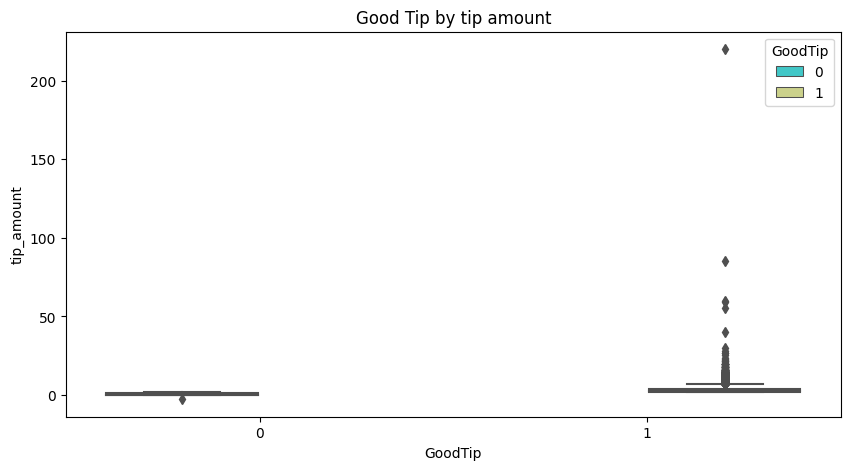

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='GoodTip',y='tip_amount',data= df, palette='rainbow', hue='GoodTip')
plt.title("Good Tip by tip amount")

<font size=3> Plotting the Distribution of Tip Amount <font>

<Axes: >

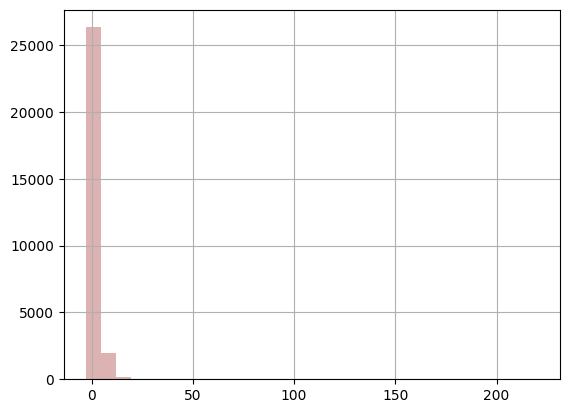

In [19]:
df['tip_amount'].hist(bins=30,color='darkred',alpha=0.3)

Number of cases higher than 25 dollars: 11


<Axes: >

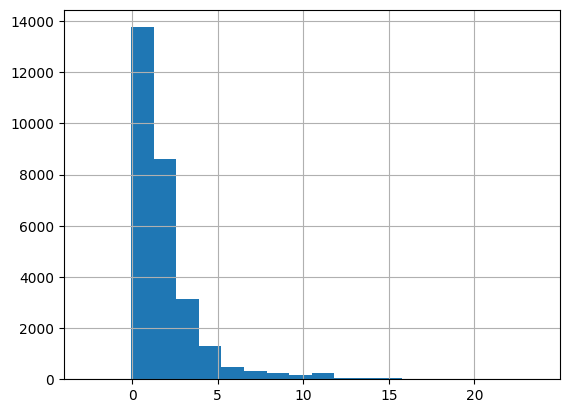

In [20]:
print("Number of cases higher than 25 dollars:", len(df[df["tip_amount"]> 25]))

Starting_from_25 = df[df["tip_amount"] < 25]

Starting_from_25["tip_amount"].hist(bins=20)

## Modeling

<font size=3> Handling Data Imbalance with SMOTE <font>

In [21]:
# Split the DataFrame into the train and test sets.
X = df.drop(['GoodTip','tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag'],axis=1)   # DataFrame consisting of other features 
y = df['GoodTip'] # DataFrame containing the GoodTip variable
# Oversampling technique- SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

<font size=3> Splitting the Data <font>

In [22]:
# Split the DataFrame into the train and test sets such that test set has 30% of the values.
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24486, 18) (10494, 18) (24486,) (10494,)


<font size=5> Logistic Regression <font>

In [23]:
# Deploy the 'LogisticRegression' model using the 'fit()' function.
log_reg = LogisticRegression(n_jobs = -1)
log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)

0.9910152740341419

<font size=4>Evaluation of Logistic Regression <font>

In [24]:
y_pred = log_reg.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("*"*100)
print("Classification report")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[5211   71]
 [  19 5193]]
****************************************************************************************************
Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5282
           1       0.99      1.00      0.99      5212

    accuracy                           0.99     10494
   macro avg       0.99      0.99      0.99     10494
weighted avg       0.99      0.99      0.99     10494



<font size=4> Decision Tree <font>

In [25]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

<font size=4>Evaluation of Decision Tree<font>

In [26]:
y_pred = clf.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("*"*100)
print("Classification report")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[5282    0]
 [   0 5212]]
****************************************************************************************************
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5282
           1       1.00      1.00      1.00      5212

    accuracy                           1.00     10494
   macro avg       1.00      1.00      1.00     10494
weighted avg       1.00      1.00      1.00     10494



<font size=4>Random Forest Classifier <font>


In [27]:
# Build the Random Forest Classifier prediction model.
rf_clf = RandomForestClassifier(n_jobs = -1, n_estimators = 100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

<font size=4>Evaluation of Random Forest<font>

In [28]:
#Evaluation of Random Forest Classifier 
rf_y_pred = rf_clf.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, rf_y_pred))
print("*"*100)
print("Classification report")
print(classification_report(y_test, rf_y_pred))

Confusion Matrix
[[5282    0]
 [   1 5211]]
****************************************************************************************************
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5282
           1       1.00      1.00      1.00      5212

    accuracy                           1.00     10494
   macro avg       1.00      1.00      1.00     10494
weighted avg       1.00      1.00      1.00     10494



We observe that the model score is 1.

<font size =3>Understanding the most important features of according to Random Forest Classifier <font>

<BarContainer object of 18 artists>

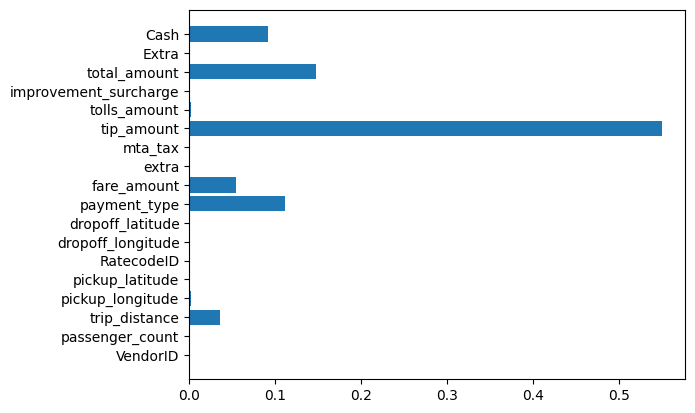

In [29]:
plt.barh(X.columns, rf_clf.feature_importances_)

<font size =3> Observation <font>

- It can be observed that features like Cash, fare amount, payment type, trip distance and tip amount are very important to classify if the tip awarded was good or not.
- All these features make logical sense, in determining the GoodTip.